In [1]:
import os

for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob

# Set a random seed for reproducibility
np.random.seed(21)


In [ ]:
from PIL import Image
import numpy as np
import os

# Define directories for image data
directory_benign_train = r'E:\Final Project\skin cancer1\input\train\benign'
directory_malignant_train = r'E:\Final Project\skin cancer1\input\train\malignant'
directory_benign_test = r'E:\Final Project\skin cancer1\input\test\benign'
directory_malignant_test = r'E:\Final Project\skin cancer1\input\test\malignant'

# Function to read and convert images to numpy arrays
read = lambda imname: np.asarray(Image.open(imname).convert('RGB'))

# Load train images
img_benign_train = [read(os.path.join(directory_benign_train, filename)) for filename in os.listdir(directory_benign_train)]
img_malignant_train = [read(os.path.join(directory_malignant_train, filename)) for filename in os.listdir(directory_malignant_train)]

# Load test images
img_benign_test = [read(os.path.join(directory_benign_test, filename)) for filename in os.listdir(directory_benign_test)]
img_malignant_test = [read(os.path.join(directory_malignant_test, filename)) for filename in os.listdir(directory_malignant_test)]

# Check the type of img_benign_train
print(type(img_benign_train))


<class 'list'>


In [4]:
import numpy as np

# Convert lists of images to NumPy arrays
X_benign_train = np.array(img_benign_train, dtype='uint8')
X_malignant_train = np.array(img_malignant_train, dtype='uint8')

X_benign_test = np.array(img_benign_test, dtype='uint8')
X_malignant_test = np.array(img_malignant_test, dtype='uint8')

# Check the type of X_benign_train
print(type(X_benign_train))

<class 'numpy.ndarray'>


In [5]:
# For y_malignant_train
y_malignant_train = np.ones(X_malignant_train.shape[0])

# To check the length of y_malignant_train
print(len(y_malignant_train))


1197


In [6]:
import numpy as np

# Create X_benign_train, X_malignant_train, X_benign_test, X_malignant_test as NumPy arrays (as shown in your previous code)

# Creating labels: benign is 0 and malignant is 1
y_benign_train = np.zeros(X_benign_train.shape[0])
y_malignant_train = np.ones(X_malignant_train.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])

# Merging data to form complete training and test sets
X_train = np.concatenate((X_benign_train, X_malignant_train), axis=0) 
y_train = np.concatenate((y_benign_train, y_malignant_train), axis=0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis=0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis=0)

# Check the shape of the datasets
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

# Print the value of y_test
print("Value of y_test: ", y_test)


Shape of X_train:  (2637, 224, 224, 3)
Shape of y_train:  (2637,)
Shape of X_test:  (660, 224, 224, 3)
Shape of y_test:  (660,)
Value of y_test:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [7]:
import numpy as np

# Create a shuffle index for X_train
s1 = np.arange(X_train.shape[0])
np.random.shuffle(s1)

# Shuffle X_train and y_train
X_train = X_train[s1]
y_train = y_train[s1]

# Create a shuffle index for X_test
s2 = np.arange(X_test.shape[0])
np.random.shuffle(s2)

# Shuffle X_test and y_test
X_test = X_test[s2]
y_test = y_test[s2]

In [8]:
# Print the shuffled order for s1
print("Shuffle order example for s1: ", s1)

Shuffle order example for s1:  [1410  127 2157 ...  772 1848 1231]


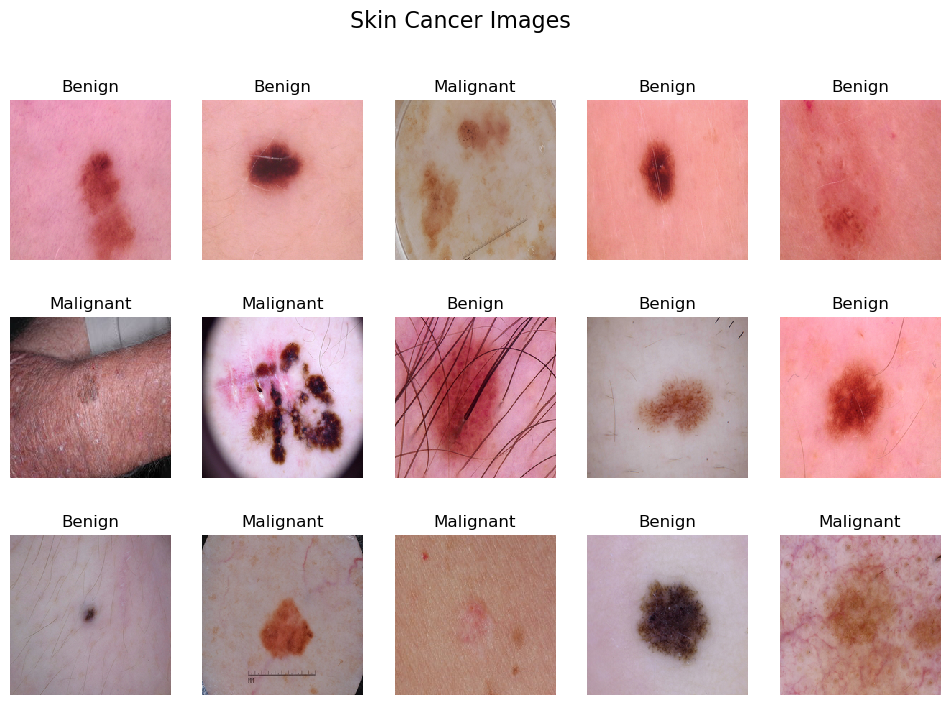

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 5, figsize=(12, 8))
fig.suptitle('Skin Cancer Images', fontsize=16)

for i, ax in enumerate(axes.flat):
    if y_train[i] == 0:
        label = 'Benign'
    else:
        label = 'Malignant'
    
    ax.imshow(X_train[i], interpolation='nearest')
    ax.set_title(label)
    ax.axis('off')

plt.show()

In [10]:
import keras
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Check the type of y_train
print("Type of y_train:", type(y_train))



Type of y_train: <class 'numpy.ndarray'>


In [11]:
y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [12]:
# Normalize the pixel values in the image data
X_train = X_train / 255.0
X_test = X_test / 255.0


In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam

def build_cnn_model(input_shape=(224, 224, 3), num_classes=2):
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', input_shape=input_shape, activation='relu', kernel_initializer='glorot_uniform'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='glorot_uniform'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Flatten and fully connected layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='normal'))
    model.add(Dense(128, activation='relu', kernel_initializer='normal'))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Model summary
    model.summary()

    # Optimizer: Adam
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create the model
cnn_model = build_cnn_model()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 64)       

In [14]:
from keras.callbacks import ReduceLROnPlateau

# Create a learning rate annealer callback
learning_rate_annealer = ReduceLROnPlateau(monitor='val_accuracy',
                                           patience=5,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=1e-7)

# Train the model
history = cnn_model.fit(X_train,
                        y_train,
                        validation_split=0.2,
                        epochs=50,
                        batch_size=64,
                        verbose=1,
                        callbacks=[learning_rate_annealer])

# List all available metrics in the history object
print("Available metrics in history:", history.history.keys())


Epoch 1/50


33/33 [==============================] - 73s 2s/step - loss: 0.9838 - accuracy: 0.5567 - val_loss: 0.6369 - val_accuracy: 0.6705 - lr: 0.0010
Epoch 2/50
33/33 [==============================] - 63s 2s/step - loss: 0.6164 - accuracy: 0.6719 - val_loss: 0.6522 - val_accuracy: 0.7102 - lr: 0.0010
Epoch 3/50
33/33 [==============================] - 59s 2s/step - loss: 0.5145 - accuracy: 0.7392 - val_loss: 0.5059 - val_accuracy: 0.7367 - lr: 0.0010
Epoch 4/50
33/33 [==============================] - 59s 2s/step - loss: 0.4807 - accuracy: 0.7520 - val_loss: 0.5303 - val_accuracy: 0.7538 - lr: 0.0010
Epoch 5/50
33/33 [==============================] - 58s 2s/step - loss: 0.4242 - accuracy: 0.7942 - val_loss: 0.4484 - val_accuracy: 0.7670 - lr: 0.0010
Epoch 6/50
33/33 [==============================] - 59s 2s/step - loss: 0.4013 - accuracy: 0.7904 - val_loss: 0.4598 - val_accuracy: 0.7557 - lr: 0.0010
Epoch 7/50
33/33 [==============================] - 60s 2s/step - loss: 0.3760 -

33/33 [==============================] - ETA: 0s - loss: 0.0165 - accuracy: 0.9962
Epoch 44: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
33/33 [==============================] - 57s 2s/step - loss: 0.0165 - accuracy: 0.9962 - val_loss: 0.9073 - val_accuracy: 0.8087 - lr: 1.5625e-05
Epoch 45/50
33/33 [==============================] - 928s 11s/step - loss: 0.0155 - accuracy: 0.9991 - val_loss: 0.9080 - val_accuracy: 0.8087 - lr: 7.8125e-06
Epoch 46/50
33/33 [==============================] - 56s 2s/step - loss: 0.0158 - accuracy: 0.9986 - val_loss: 0.9182 - val_accuracy: 0.8106 - lr: 7.8125e-06
Epoch 47/50
33/33 [==============================] - 64s 2s/step - loss: 0.0154 - accuracy: 0.9986 - val_loss: 0.9199 - val_accuracy: 0.8087 - lr: 7.8125e-06
Epoch 48/50
33/33 [==============================] - 63s 2s/step - loss: 0.0152 - accuracy: 0.9995 - val_loss: 0.9194 - val_accuracy: 0.8106 - lr: 7.8125e-06
Epoch 49/50
33/33 [==============================] - ETA: 0s

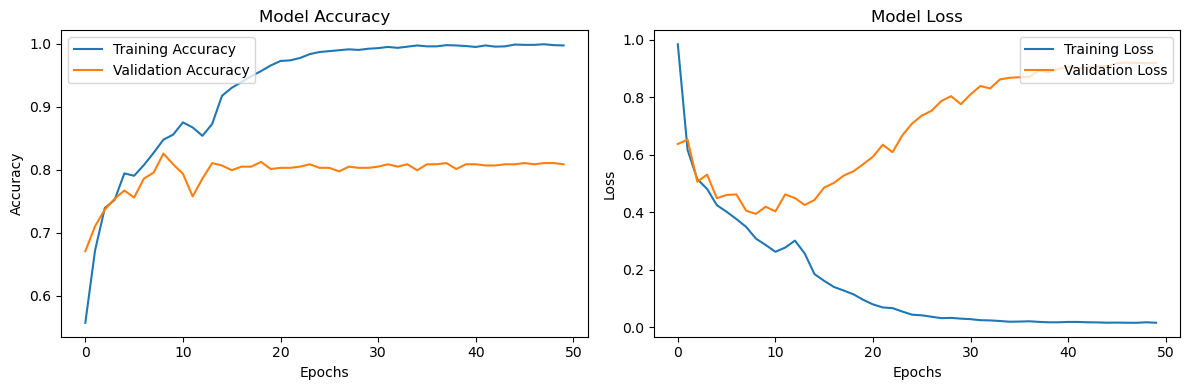

In [15]:
import matplotlib.pyplot as plt
# Plot model accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='upper left')

# Plot model loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [16]:
from sklearn.metrics import accuracy_score

# Testing the model on test data for evaluation
y_pred = np.argmax(cnn_model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

print("Test accuracy:", accuracy)

21/21 [==============================] - 4s 173ms/step
Test accuracy: 0.8348484848484848


In [17]:
y_pred = y_pred.astype('uint8')


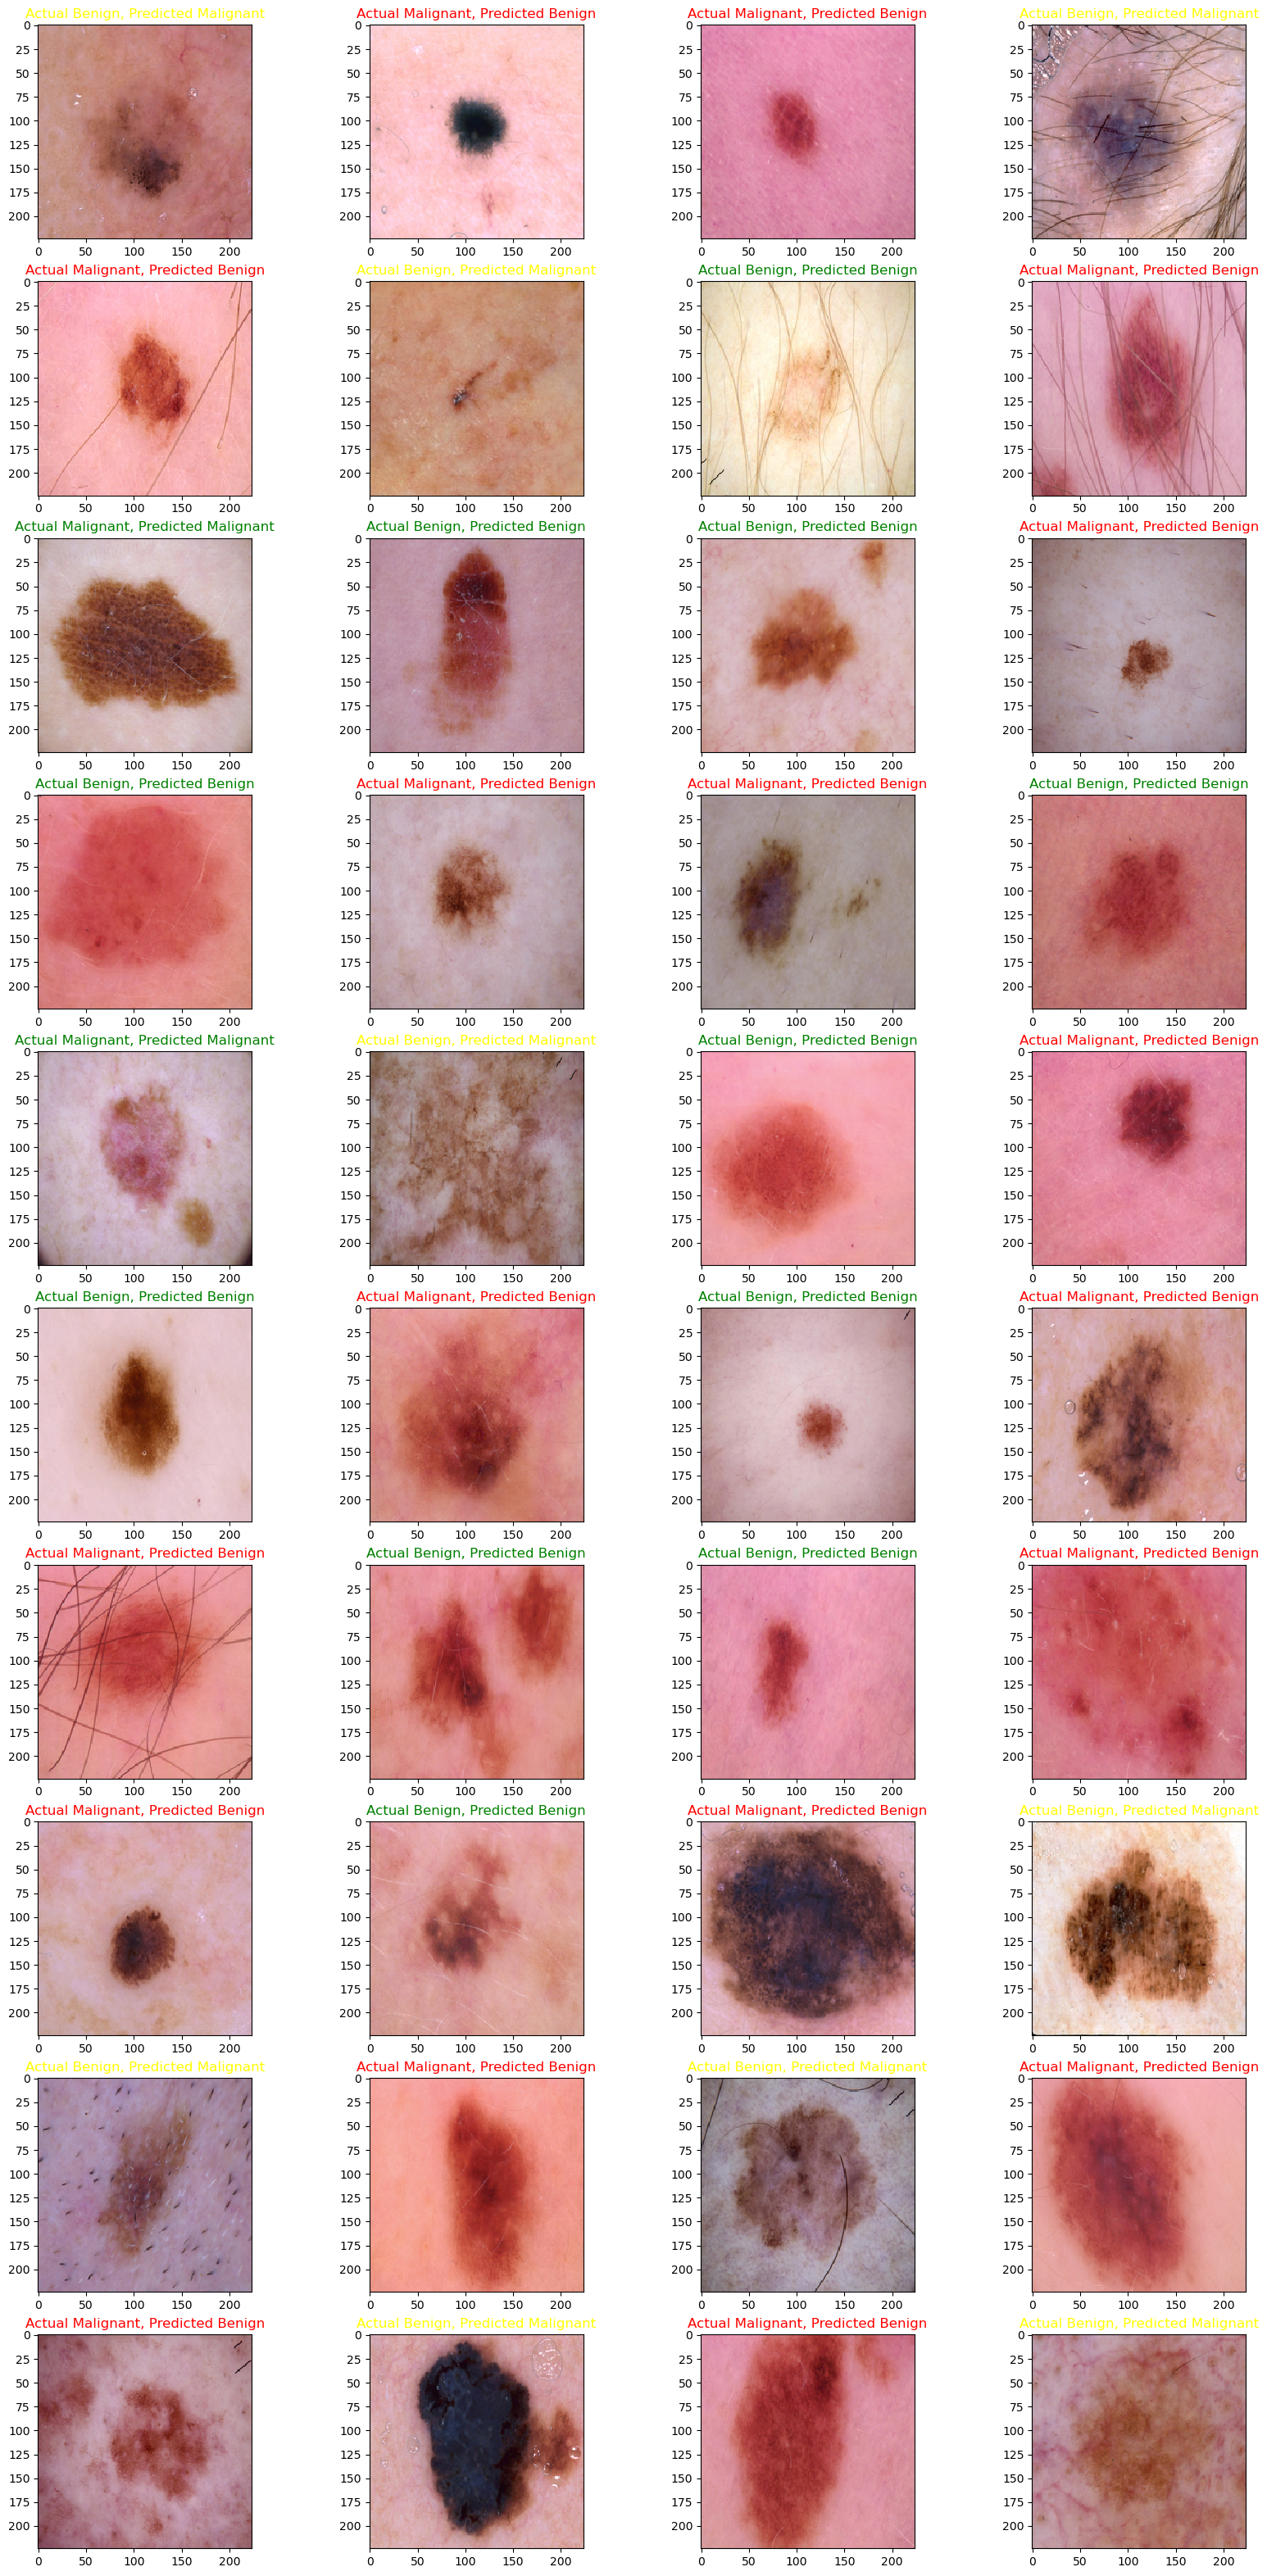

In [18]:
# Shuffling data
s2 = np.arange(X_test.shape[0])
np.random.shuffle(s2)
X_test = X_test[s2]
y_test = y_test[s2].ravel()  # Flatten y_test
y_pred = y_pred[s2].ravel()  # Flatten y_pred

# Plotting
fig = plt.figure(figsize=(20, 40))
columns = 4
rows = 10

for i in range(columns * rows):
    ax = fig.add_subplot(rows, columns, i + 1)  # Add 1 to the index to start from 1
    actual_label = y_test[i]
    predicted_label = y_pred[i]
    
    if actual_label == 0:
        if predicted_label == 0:
            ax.set_title('Actual Benign, Predicted Benign', color='green')
        else:
            ax.set_title('Actual Benign, Predicted Malignant', color='yellow')
    else:
        if predicted_label == 1:
            ax.set_title('Actual Malignant, Predicted Malignant', color='green')
        else:
            ax.set_title('Actual Malignant, Predicted Benign', color='red')

    plt.imshow(X_test[i], interpolation='nearest')

plt.show()